In [1]:
import pandas as pd
df = pd.read_csv('./Actors.csv')

In [2]:
import numpy as np
df

,File_name,Lable
0,ajith (1).wav,Ajith
1,ajith (2).wav,Ajith
2,ajith (3).wav,Ajith
3,ajith (4).wav,Ajith
4,ajith (5).wav,Ajith
...,...,...
3113,VJS (224).wav,Vjs
3114,VJS (225).wav,Vjs
3115,VJS (226).wav,Vjs
3116,VJS (227).wav,Vjs


In [3]:
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


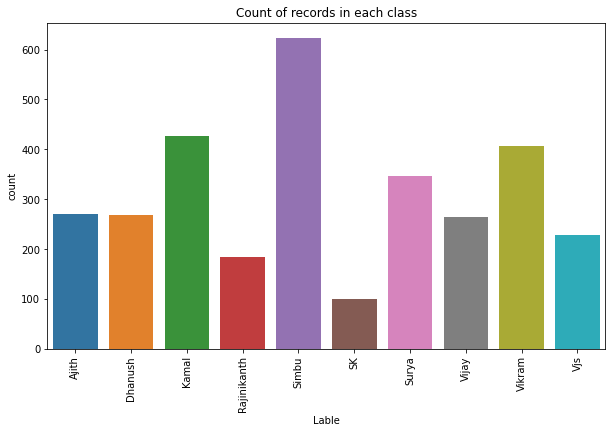

In [4]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(df['Lable'])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

In [5]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [6]:
import librosa
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    #path+ df['Lable'].iloc[i]+ '/'+ df['File_name'].iloc[i]
    file_name = './'+str(row["Lable"])+'/'+str(row["File_name"])
    final_class_labels=str(row["Lable"])
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1it [00:32, 32.95s/it]C:\Users\user\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
3118it [23:44,  2.19it/s]


In [7]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-96.46202, 120.98026, -13.136194, 32.51784, -...",Ajith
1,"[-177.50673, 114.59962, -15.159489, 28.136223,...",Ajith
2,"[-167.54503, 119.68055, 0.7810209, 43.53969, 1...",Ajith
3,"[-176.82582, 104.19141, -3.9628088, 36.91024, ...",Ajith
4,"[-118.63702, 105.61698, -4.516064, 32.764156, ...",Ajith


In [27]:
# df is a pandas dataframe
# default parameters pandas Series.str.split() function
extracted_features_df['feature'].str.split(',', expand=False)
extracted_features_df['feature']

0       [-96.46202, 120.98026, -13.136194, 32.51784, -...
1       [-177.50673, 114.59962, -15.159489, 28.136223,...
2       [-167.54503, 119.68055, 0.7810209, 43.53969, 1...
3       [-176.82582, 104.19141, -3.9628088, 36.91024, ...
4       [-118.63702, 105.61698, -4.516064, 32.764156, ...
                              ...                        
3113    [-169.70229, 200.3103, -45.811256, 36.43981, 1...
3114    [-49.119003, 92.658165, -2.2406955, 28.012579,...
3115    [-201.14825, 215.14545, -74.42116, 31.135, 4.2...
3116    [-198.12184, 216.14163, -45.116287, 20.650446,...
3117    [-215.32394, 225.84468, -44.28205, 18.792059, ...
Name: feature, Length: 3118, dtype: object

In [31]:
dfs = pd.DataFrame(extracted_features_df.iloc[:,0].to_list())
dfs.to_csv('Actor_Feature.csv',header=True)